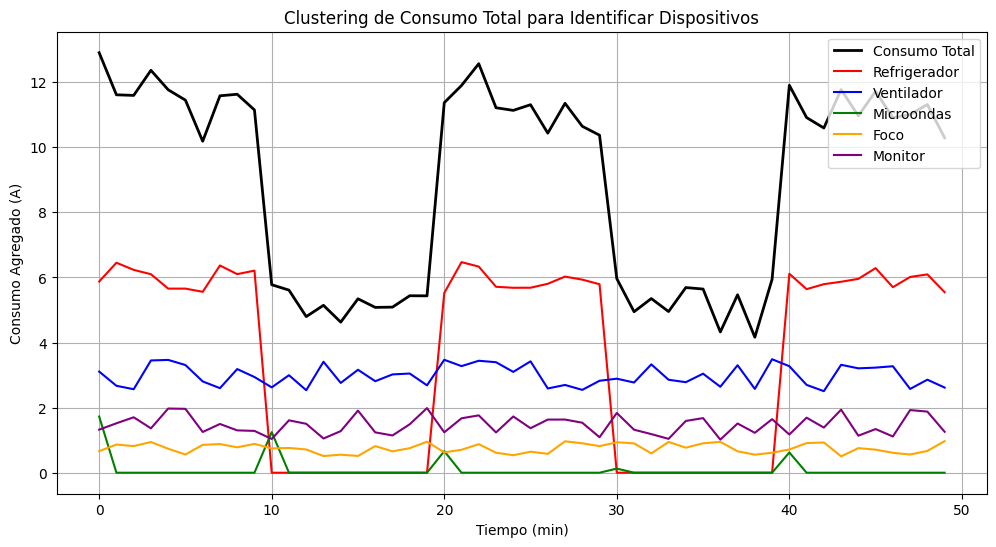

Consumo estimado del ventilador: 8.06 A
Consumo estimado del foco: 8.06 A
Consumo estimado del refrigerador: -5.78 A
Consumo estimado del microondas (cuando está encendido): 0.09 A
Consumo estimado del monitor: 1.46 A
    Time  Total_Consumption  Cluster
0      0          12.902859        2
1      1          11.610122        2
2      2          11.591621        2
3      3          12.362613        2
4      4          11.764642        2
5      5          11.445463        2
6      6          10.183094        1
7      7          11.579635        2
8      8          11.626744        2
9      9          11.145120        1
10    10           5.775947        0
11    11           5.609522        0
12    12           4.796096        0
13    13           5.142989        0
14    14           4.626339        0
15    15           5.343132        0
16    16           5.079348        0
17    17           5.087162        0
18    18           5.437349        0
19    19           5.433389        0


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Crear dataset simulado con 50 puntos
np.random.seed(42)

# Simulamos 50 minutos de mediciones
time = np.arange(0, 50, 1)

# Consumo del refrigerador (ciclo de encendido/apagado con ruido)
refrigerator = np.array([np.random.uniform(5.5, 6.5) if (i // 10) % 2 == 0 else 0 for i in time])

# Consumo del ventilador (constante con ruido)
fan = np.random.uniform(2.5, 3.5, len(time))

# Consumo del microondas (se enciende brevemente)
microwave = np.array([np.random.uniform(0, 2.0) if i % 10 == 0 else 0 for i in time])

# Consumo del foco (constante)
light_bulb = np.random.uniform(0.5, 1.0, len(time))

# Consumo del monitor (constante)
monitor = np.random.uniform(1.0, 2.0, len(time))

# Consumo total (agregado) con algo de ruido
total_consumption = (refrigerator + fan + microwave + light_bulb + monitor + 
                     np.random.normal(0, 0.2, len(time)))

# Crear un DataFrame con los datos
df = pd.DataFrame({
    'Time': time,
    'Total_Consumption': total_consumption
})

# 2. Aplicar clustering (K-Means) con los datos agregados
X = df[['Total_Consumption']]

# Elegimos 3 clusters porque sabemos que hay 5 dispositivos
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 3. Estimar consumo de dispositivos
# Utilizamos la misma estimación de consumo que antes
cluster_0 = df[df['Cluster'] == 0]['Total_Consumption'].mean()  # Cluster más bajo
cluster_1 = df[df['Cluster'] == 1]['Total_Consumption'].mean()  # Cluster intermedio
cluster_2 = df[df['Cluster'] == 2]['Total_Consumption'].mean()  # Cluster más alto

fan_estimate = (cluster_0 + cluster_1) / 2  # Ventilador promedio
light_bulb_estimate = (cluster_0 + cluster_1) / 2  # Foco promedio
both_estimate = cluster_2
refrigerator_estimate = both_estimate - fan_estimate - light_bulb_estimate - np.mean(microwave) - np.mean(monitor)

# 4. Visualización de los clusters
plt.figure(figsize=(12, 6))

# Colores para cada dispositivo
colors = {
    'Refrigerador': 'red',
    'Ventilador': 'blue',
    'Microondas': 'green',
    'Foco': 'orange',
    'Monitor': 'purple',
    'Total': 'black'
}

# Graficar consumo total
plt.plot(df['Time'], df['Total_Consumption'], label='Consumo Total', color=colors['Total'], linewidth=2)

# Graficar cada dispositivo
plt.plot(df['Time'], refrigerator, label='Refrigerador', color=colors['Refrigerador'])
plt.plot(df['Time'], fan, label='Ventilador', color=colors['Ventilador'])
plt.plot(df['Time'], microwave, label='Microondas', color=colors['Microondas'])
plt.plot(df['Time'], light_bulb, label='Foco', color=colors['Foco'])
plt.plot(df['Time'], monitor, label='Monitor', color=colors['Monitor'])

# Personalizar gráfico
plt.title('Clustering de Consumo Total para Identificar Dispositivos')
plt.xlabel('Tiempo (min)')
plt.ylabel('Consumo Agregado (A)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir estimaciones
print(f"Consumo estimado del ventilador: {fan_estimate:.2f} A")
print(f"Consumo estimado del foco: {light_bulb_estimate:.2f} A")
print(f"Consumo estimado del refrigerador: {refrigerator_estimate:.2f} A")
print(f"Consumo estimado del microondas (cuando está encendido): {np.mean(microwave):.2f} A")
print(f"Consumo estimado del monitor: {np.mean(monitor):.2f} A")

# Imprimir algunos resultados
print(df.head(20))


REALES

                Tiempo  Refrigerador (A)  Ventilador (A)  Microondas (A)  \
0  2024-01-01 00:00:00          5.323220        1.311796        0.401260   
1  2024-01-01 00:01:00          5.572784        1.696343        0.929291   
2  2024-01-01 00:02:00          5.404145        1.377752        0.099615   
3  2024-01-01 00:03:00          5.317325        1.179604        0.945302   
4  2024-01-01 00:04:00          5.135482        1.024679        0.869489   

   Foco (A)  Monitor (A)  Consumo Total (A)  
0  0.517466     0.815997           8.369739  
1  0.532799     1.055882           9.787100  
2  0.568035     0.963321           8.412868  
3  0.506321     0.950963           8.899513  
4  0.560725     1.123746           8.714120  


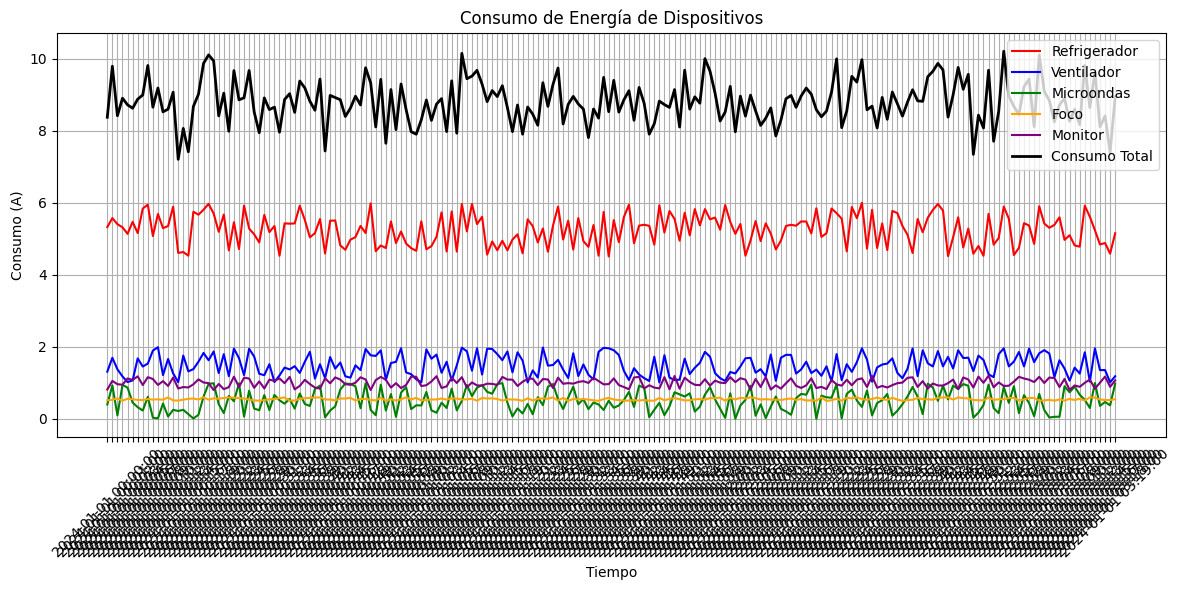

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un CSV
df = pd.read_csv('consumo_energia.csv')  # Asegúrate de que la ruta sea correcta

# Inspeccionar los datos
print(df.head())

# Calcular el consumo total en cada instante (si no está ya en el CSV)
df['Consumo Total (A)'] = df[['Refrigerador (A)', 'Ventilador (A)', 'Microondas (A)', 'Foco (A)', 'Monitor (A)']].sum(axis=1)

# Visualizar el consumo de cada dispositivo
plt.figure(figsize=(12, 6))

# Graficar cada dispositivo
plt.plot(df['Tiempo'], df['Refrigerador (A)'], label='Refrigerador', color='red')
plt.plot(df['Tiempo'], df['Ventilador (A)'], label='Ventilador', color='blue')
plt.plot(df['Tiempo'], df['Microondas (A)'], label='Microondas', color='green')
plt.plot(df['Tiempo'], df['Foco (A)'], label='Foco', color='orange')
plt.plot(df['Tiempo'], df['Monitor (A)'], label='Monitor', color='purple')

# Graficar el consumo total
plt.plot(df['Tiempo'], df['Consumo Total (A)'], label='Consumo Total', color='black', linewidth=2)

# Personalizar gráfico
plt.title('Consumo de Energía de Dispositivos')
plt.xlabel('Tiempo')
plt.ylabel('Consumo (A)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                Tiempo  Refrigerador (A)  Ventilador (A)  Microondas (A)  \
0  2024-01-01 00:00:00          5.323220        1.311796        0.401260   
1  2024-01-01 00:01:00          5.572784        1.696343        0.929291   
2  2024-01-01 00:02:00          5.404145        1.377752        0.099615   
3  2024-01-01 00:03:00          5.317325        1.179604        0.945302   
4  2024-01-01 00:04:00          5.135482        1.024679        0.869489   

   Foco (A)  Monitor (A)  Consumo Total (A)  
0  0.517466     0.815997           8.369739  
1  0.532799     1.055882           9.787100  
2  0.568035     0.963321           8.412868  
3  0.506321     0.950963           8.899513  
4  0.560725     1.123746           8.714120  


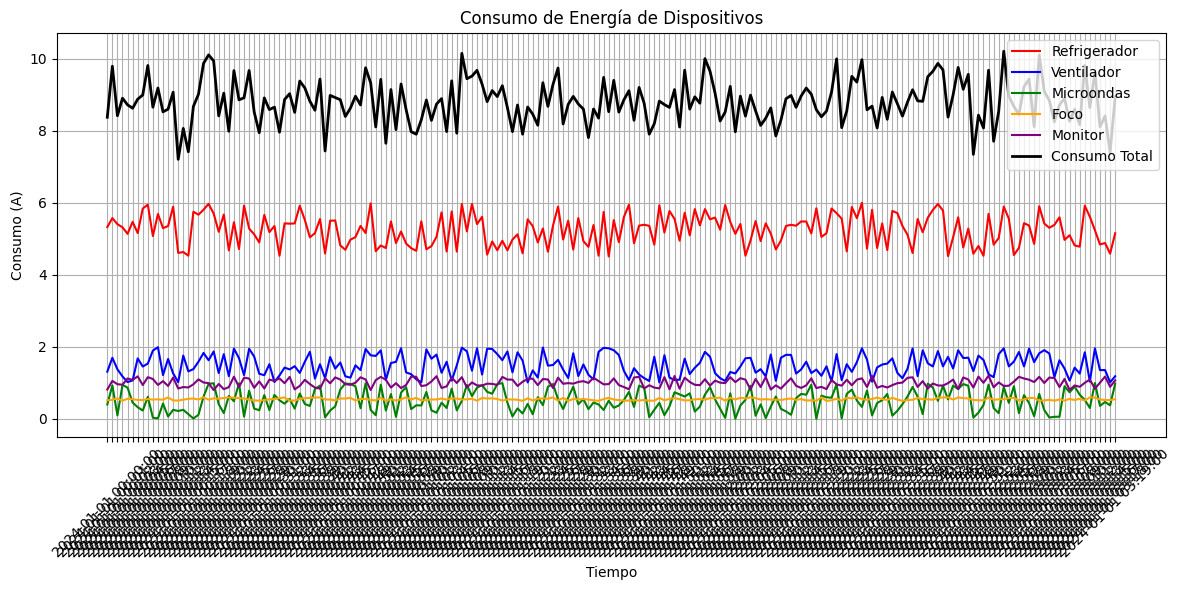

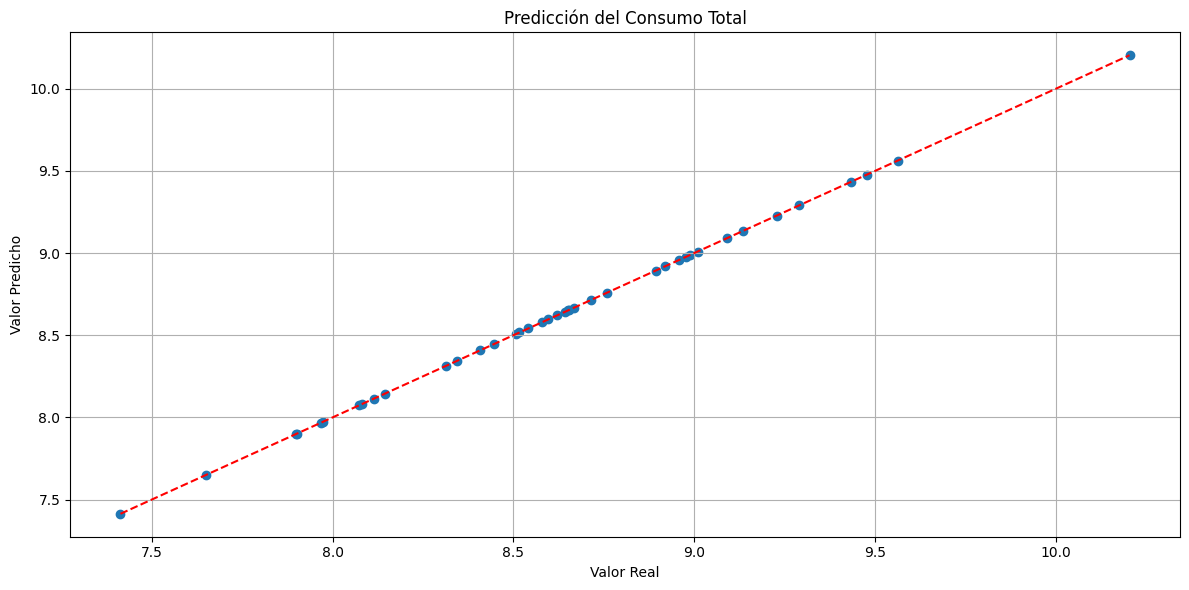

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un CSV
df = pd.read_csv('consumo_energia.csv')  # Asegúrate de que la ruta sea correcta

# Inspeccionar los datos
print(df.head())

# Calcular el consumo total en cada instante (si no está ya en el CSV)
df['Consumo Total (A)'] = df[['Refrigerador (A)', 'Ventilador (A)', 'Microondas (A)', 'Foco (A)', 'Monitor (A)']].sum(axis=1)

# Visualizar el consumo de cada dispositivo
plt.figure(figsize=(12, 6))

# Graficar cada dispositivo
plt.plot(df['Tiempo'], df['Refrigerador (A)'], label='Refrigerador', color='red')
plt.plot(df['Tiempo'], df['Ventilador (A)'], label='Ventilador', color='blue')
plt.plot(df['Tiempo'], df['Microondas (A)'], label='Microondas', color='green')
plt.plot(df['Tiempo'], df['Foco (A)'], label='Foco', color='orange')
plt.plot(df['Tiempo'], df['Monitor (A)'], label='Monitor', color='purple')

# Graficar el consumo total
plt.plot(df['Tiempo'], df['Consumo Total (A)'], label='Consumo Total', color='black', linewidth=2)

# Personalizar gráfico
plt.title('Consumo de Energía de Dispositivos')
plt.xlabel('Tiempo')
plt.ylabel('Consumo (A)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preparar datos para el modelo de Machine Learning
X = df[['Refrigerador (A)', 'Ventilador (A)', 'Microondas (A)', 'Foco (A)', 'Monitor (A)']]
y = df['Consumo Total (A)']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Visualizar resultados de las predicciones
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicción del Consumo Total')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()
plt.show()
